# Introduction

*The data we are using in this project is not real. However, we are making this project looks more realistic creating some background to the (fake) company who provided the data.* 

The company is an Ecommerce based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website. We've got hired to help them figure it out!

## Imports


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme(color_codes=True)
import math

%matplotlib inline

## About the Data

We'll work with the Ecommerce Customers csv file from the company. It has Customer info, such as Email, Address, and their color Avatar. Then it also has numerical value columns:

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member. 

In [2]:
customers = pd.read_csv('Ecommerce Customers')

**Checking the head of customers so we can quickly have a visualization about the data.

In [3]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


**Doing the same with describe method, which provides some descriptive statistics.

In [4]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


**Also checking the info of costumers so we can see how many rows and columns this dataset has.

In [5]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


## Exploratory Data Analysis

**Let's explore the data!**

First thing we want to do is use seaborn to create a jointplot to compare time spent on the website versus yearly amount spent. We want to check if the correlation makes sense.

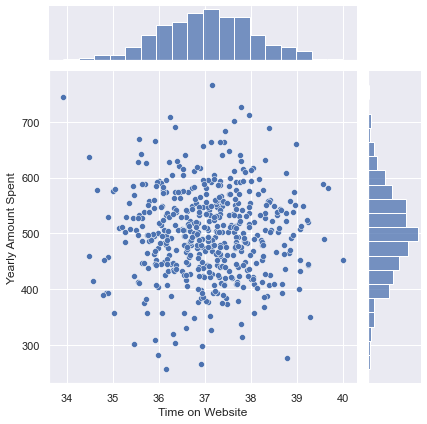

In [6]:
sns.jointplot(x='Time on Website', y='Yearly Amount Spent', data=customers)

As trying to interpret the sort of scatterplot, there doesn't appear to have a clear trend between time on the website and yearly amount spent just by looking at this visually.

Doing the same but with the Time on App column instead.

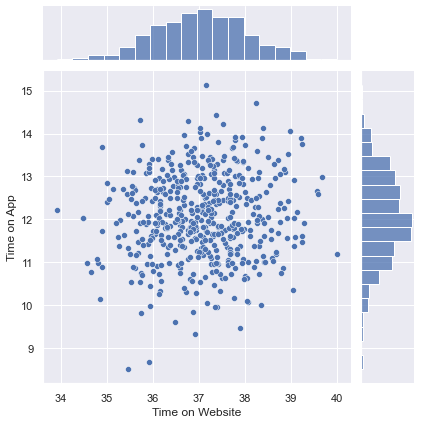

In [7]:
sns.jointplot(x='Time on Website', y='Time on App', data=customers)

It seems to have a little more correlation between the increasing time on app and the increasing yearly amount expenditure.

Let's go ahead and use jointplot to create a hexplot comparing time on app and length of membership.

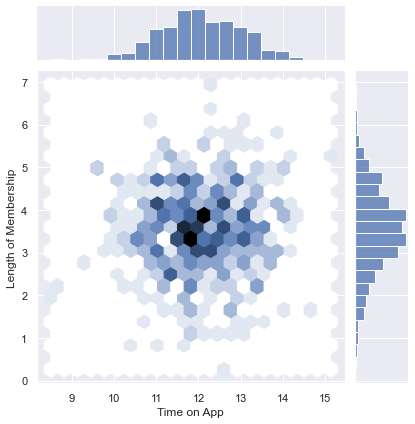

In [8]:
sns.jointplot(x='Time on App', y='Length of Membership', kind='hex', data=customers)

Let's explore these types of relationships across the entire dataset using pairplot.

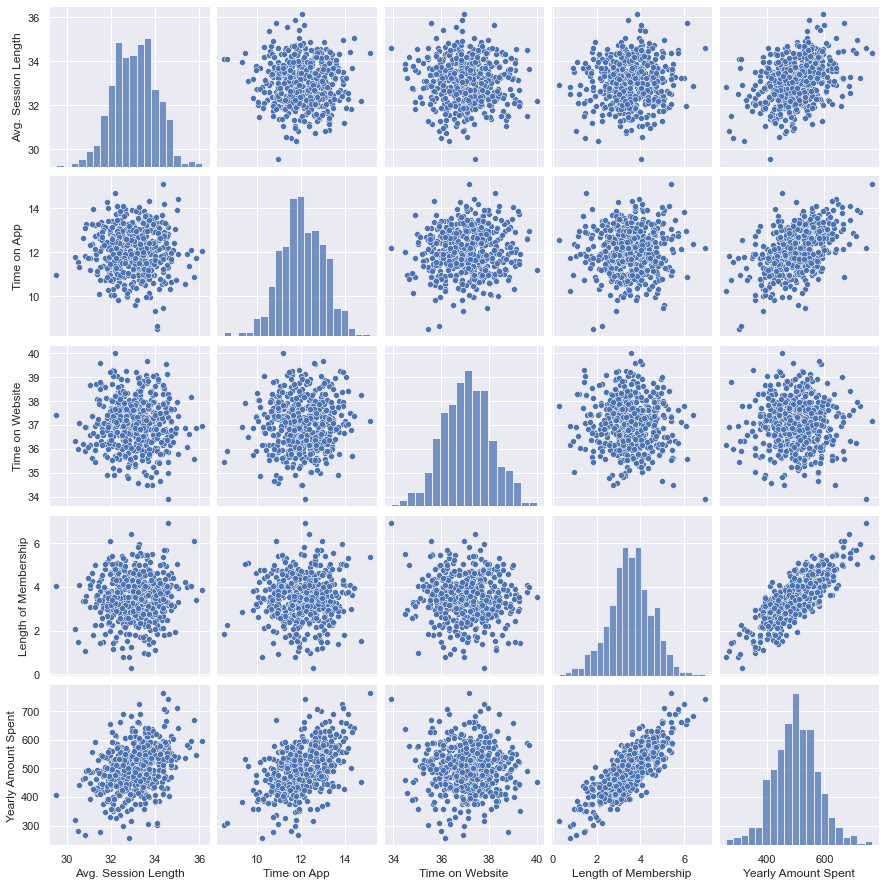

In [9]:
sns.pairplot(data=customers)

Based off this plot we can conclude the most correlated feature with Yearly Amount Spent is Length of Membership.

Now what we want to do is create a linear model plot of the yearly amount spent versus length of membership to actually try to plot out that relationship a little more detailed.

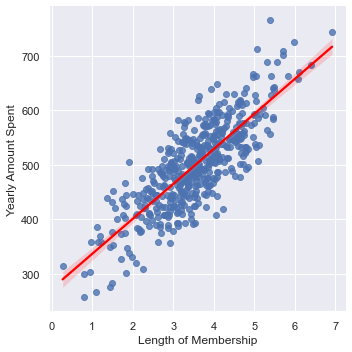

In [10]:
sns.lmplot(x='Length of Membership', y='Yearly Amount Spent', data=customers, line_kws={'color': 'red'})

There seems to be a good linear fit on this data. You can notice that because there's very little error as far as these error bars go. So we already have a good idea that the longer you stay as a membership, the higher your yearly amount expenditure is going to be, which makes sense.

## Training and Testing Data

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets.

In [11]:
X = customers[["Avg. Session Length", "Time on App", "Time on Website", "Length of Membership"]]

y = customers['Yearly Amount Spent']

We use model_selection.train_test_split from sklearn to split the data into training and testing sets.

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Training the Model

Now it's time to train our model on our training data!


In [14]:
from sklearn.linear_model import LinearRegression

Creating an instance of a LinearRegression() model named lm.

In [15]:
lm = LinearRegression()

Train/fit lm on the training data.

In [16]:
lm.fit(X_train, y_train)

LinearRegression()

**Print out the coefficients of the model**

In [17]:
lm.coef_

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

## Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values.

In [18]:
predictions = lm.predict(X_test)
len(predictions)

150

We want to create a scatterplot of the real test values versus the predicted values.

Text(0, 0.5, 'Predicted Values')

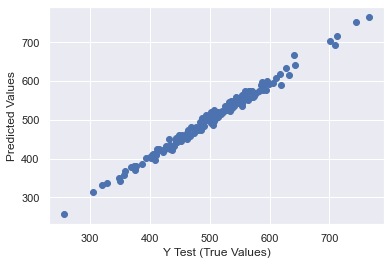

In [19]:
plt.scatter(y_test, predictions)
plt.xlabel('Y Test (True Values)')
plt.ylabel('Predicted Values')

This model is doing quite well. If this was an absolutely perfect line of all dots on top of each other, it would mean we have a perfect model on the test data.

## Evaluating the Model

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

Calculating the Mean Absolute Error <a href="https://en.wikipedia.org/wiki/Mean_absolute_error">(MAE)</a>, Mean Squared Error <a href='https://en.wikipedia.org/wiki/Mean_squared_error'>(MSE)</a> and Root Mean Squared Error <a href='https://en.wikipedia.org/wiki/Root-mean-square_deviation'>(RMSE).</a>

This can be done by a lot of ways. We're creating some functions to demonstrate how the mathemathics operates behind the stage, but we're also using built-in methods from sklearn, because it is easier.

In [20]:
def mae(y_test, predictions):
    y_test, predictions = np.array(y_test), np.array(predictions)
    return np.mean(np.abs(y_test - predictions))

def mse(y_test, predictions):
    return np.square(np.subtract(np.array(y_test),
    np.array(predictions))).mean()

def rmse(y_test, predictions):
    return math.sqrt(np.square(np.subtract(np.array(y_test),
    np.array(predictions))).mean())

print(mae(y_test, predictions))
print(mse(y_test, predictions))
print(rmse(y_test, predictions))

7.228148653430832
79.81305165097456
8.93381506697864


The built-in methods we mentioned above.

In [21]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))


MAE: 7.228148653430832
MSE: 79.81305165097456
RMSE: 8.93381506697864


Now let's create the explained variance score, which is basically a measurement of how much variance our model explains.

In [24]:
metrics.explained_variance_score(y_test, predictions)

0.9890771231889607

We explain about 99% of the variance, which indicates this is a very good fit model.

## Residuals

Let's quickly explore the residuals to make sure everything was okay with our data. 

We are plotting a histogram of the residuals and make sure it looks normally distributed.

<AxesSubplot:xlabel='Yearly Amount Spent', ylabel='Count'>

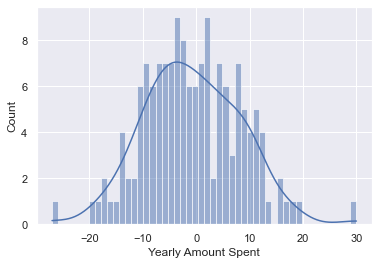

In [22]:
sns.histplot((y_test-predictions),bins=50, kde=True)

It looks pretty normal given what we have been working with. We already know we have a good fitting model, so let's not concern about the residuals.

## Conclusion
We still want to figure out the answer to the original question, do we focus our efforts on mobile app or website development? Or maybe that doesn't even really matter, and Membership Time is what is really important.  Let's see if we can interpret the coefficients at all to get an idea.

In [23]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


How do we interpret these coefficients?

- Holding all other features fixed, a 1 unit increase in **Avg. Session Length** is associated with an **increase of 25.98 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Time on App** is associated with an **increase of 38.59 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Time on Website** is associated with an **increase of 0.19 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Length of Membership** is associated with an **increase of 61.27 total dollars spent**.

**The company should focus more on their mobile app or on their website?**


This is tricky, there are two ways to think about this: Develop the Website to catch up to the performance of the mobile app, or develop the app more since that is what is working better. This sort of answer really depends on the other factors going on at the company, you would probably want to explore the relationship between Length of Membership and the App or the Website before coming to a conclusion!